<a href="https://colab.research.google.com/github/araujoroberts/Proyectos/blob/main/Coordenadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Meteorito

In [79]:
# INICIALIZAMOS LOS VECTORES r0 y rf
import matplotlib.pyplot as plt
import numpy as np
import math

#Posicion inicial del meteorito y su norma
r0=np.array([0.50000,-6.50000,4.50000])
nr0=np.linalg.norm(r0)

#Velocidad inicial del meteorito y su norma
v0=np.array([0.00301739,0.00591672,-0.00102365])
nv0=np.linalg.norm(v0)

# Definimos la base gecentrica
i=np.array([1,0,0])
j=np.array([0,1,0])
k=np.array([0,0,1])

In [80]:
# Calculamos el momento angular y su norma
L=np.cross(r0,v0)
l=np.linalg.norm(L)


# Calculamos el vector nodo
N=np.cross(k,L)
n=np.linalg.norm(N)


# Calculamos el vector de exentricidad
GM=3.98613e-4
ex = np.cross(v0,L) / GM -  r0 / nr0
e=np.linalg.norm(ex)


# Calculamos los vectores base en el sistema perifocal
xp=ex/e
zp=L/l
yp=np.cross(zp,xp)


# Calculamos p y a
p=l**2/GM
a=p/(1-e**2)


# Calculamos la inclinacion del plano orbital
inclinacion=math.acos(L[2]/l)


# Calculamos la longitud del nodo acendente
if N[1]>0:
  OMEGA=math.acos(N[0]/n)  
if N[1]<0:
  OMEGA=-math.acos(N[0]/n)


# Calculamos el argumento del perigeo
if ex[-1]>0:
  w=math.acos( np.dot(N,ex) / (n*e) )
if ex[-1]<0:
  w=-math.acos( np.dot(N,ex) / (n*e) )


# Calculamos el desfase
prueba=np.dot(r0,v0)

if prueba > 0 :
  nu0=math.acos(np.dot(ex,r0)/(e*nr0))

if prueba < 0 : 
  nu0=-math.acos(np.dot(ex,r0)/(e*nr0))

print('Parametros de la orbita')
print()
print('e=',e)
print('p=',p)
print('a=',a)
print('Omega=',OMEGA)
print('w=',w)
print('nu0=',nu0)

Parametros de la orbita

e= 0.7832719700129764
p= 2.7767775713477736
a= 7.184696483761829
Omega= -2.1852099259516367
w= -2.8508170872308467
nu0= -2.548410918350726


In [81]:
# Calculamos los vectores r0' y v0'
r0t=nr0*(np.cos(nu0)*i+np.sin(nu0)*j) 
v0t=math.sqrt(GM/p)*(-np.sin(nu0)*i+(e+np.cos(nu0))*j)

print('Los vectores r0\' y v0\' son:')
print('r0\'=',r0t)
print('v0\'=',v0t)

Los vectores r0' y v0' son:
r0'= [-6.56823222 -4.4281289  -0.        ]
v0'= [ 0.00669759 -0.00054988  0.        ]


In [82]:
# Matriz de cambio de base
R11=i @ xp
R12= i @ yp
R13= i @ zp
R21=j @ xp 
R22= j @ yp
R23= j @ zp 
R31=k @ xp
R32= k @ yp
R33= k @ zp

M=np.array([ [R11,R12,R13],
            [R21,R22,R23],
            [R31,R32,R33] ] )

print('Vectores r0 y v0:')
r = M @ r0t 
print(r)

v = M @ v0t
print(v)



Vectores r0 y v0:
[ 0.5 -6.5  4.5]
[ 0.00301739  0.00591672 -0.00102365]


In [83]:
# Periodo de la orbita
T=2*np.pi/math.sqrt(GM)*a**(3/2)

# Velocidad media
n=2*np.pi/T

# Anomalia exentrica inicial
E0=2*math.atan(math.sqrt((1-e)/(1+e))*math.tan(nu0/2))

# Tiempo de paso por el perigeo
t0=(E0-e*np.sin(E0))/n 

t0

-892.7827690074421

In [84]:
# Subrutina que calcula la anomalia exentrica
def f(M_,e_,E_):
  import numpy as np
  fx  = lambda E_: E_-e_*np.sin(E_)-M_
  dfx = lambda E_: 1-e_*np.cos(E_)
  
  E0=E_
  tol=1e-8
  dE=abs(2*tol)
  Eold=E0

  while (dE >= tol):
    Enew=Eold-fx(Eold)/dfx(Eold)
    dE=abs(Enew-Eold)
    Eold=Enew

  return Enew

In [86]:
#----------------------------------------------------
# ---------Actualizacion de coordenadas--------------
#----------------------------------------------------

# tamaño de paso 
dt=0.10
t=t0
# M de arranque
Mf=n*t

# E de arranque
if Mf >= np.pi:
  Ep=Mf+e/2

if Mf < np.pi:
  Ep=Mf-e/2
 
Xlist=[] ; Ylist=[] ; Zlist=[]

for m in range(2550):
  Ef=f(Mf,e,Ep)
  nuf=2*math.atan(math.sqrt((1+e)/(1-e))*math.tan(Ef/2))
  r=p/(1+e*np.cos(nuf))
  xt=r*np.cos(nuf)
  yt=r*np.sin(nuf)
  zt=0
  rt=np.array([xt,yt,zt])
  rtt= M @ rt
  Xlist.append(rtt[0])
  Ylist.append(rtt[1])
  Zlist.append(rtt[2])
  t=t+dt
  Mf=n*t
  if Mf >= np.pi:
    Ep=Mf+e/2

  if Mf < np.pi:
    Ep=Mf-e/2 


import pandas as pd

#plt.plot(Xlist,Ylist)
#plt.xlabel('x')
#plt.ylabel('y')
#plt.grid()
#plt.show()


#Creamos una lista de listas
data = {'x':Xlist,'y':Ylist,'z':Zlist}

#Creamos un dataframe
df = pd.DataFrame(data)

df



,x,y,z
0,0.500000,-6.500000,4.500000
1,0.500302,-6.499408,4.499898
2,0.500603,-6.498817,4.499795
3,0.500905,-6.498225,4.499693
4,0.501207,-6.497633,4.499590
...,...,...,...
2545,1.243322,-4.807397,4.101104
2546,1.243598,-4.806650,4.100882
2547,1.243875,-4.805904,4.100661
2548,1.244151,-4.805157,4.100439


In [87]:
#Creamos un archivo csv de los datos obtenidos
file = open('coords.dat',"x")

In [93]:
#Escribimos los datos obtenidos en el archivo creado
df.to_csv('coords.dat', sep =' ', index = False)


#Cohete

In [65]:
import numpy as np
import math 
# r0 cohete - sistema geocentrico
r0=np.array([0.67321829 , -5.23597802 , 3.86420687])
nr0=np.linalg.norm(r0)

# v0 cohete - sistema geocentrico
v0=np.array([0.00071523 , -0.00281318 , 0.00238896])
nv0=np.linalg.norm(v0)

In [66]:
# Momento angular
h = np.cross( r0 , v0 )
nh=np.linalg.norm(h)

# Vector nodo
n = np.cross( k , h)
nn=np.linalg.norm(n)

# Exentricidad
GM=3.98613e-4
ex =( 1/GM )* np.cross(v0,h) -( 1/nr0 )* r0

# Parametros de la orbita
e=np.linalg.norm(ex)
p=nh**2/GM
a=p/(1-e**2)

In [67]:
# Vectores base del sistema perifocal
xp=ex/e
zp=h/nh
yp=np.cross(zp,xp)

# Vectores base del sistema geocentrico
i=np.array([1,0,0])
j=np.array([0,1,0])
k=np.array([0,0,1])

# Matriz de cambio de base
R11=i @ xp
R12= i @ yp
R13= i @ zp
R21=j @ xp 
R22= j @ yp
R23= j @ zp 
R31=k @ xp
R32= k @ yp
R33= k @ zp

M=np.array([ [R11,R12,R13],
            [R21,R22,R23],
            [R31,R32,R33] ] )

In [68]:
# Periodo de la orbita
T=2*np.pi/math.sqrt(GM)*a**(3/2)

#velocidad media 
n=2*np.pi/T

#Anomalia exentrica inicial
E0=2*math.atan(math.sqrt((1-e)/(1+e))*math.tan(nu0/2))



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


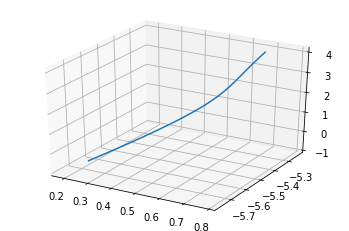

array([ 0.67321829, -5.23597802,  3.86420687])

In [77]:
Xlist=[] ; Ylist=[] ; Zlist=[]

dt=0
for i in range(500):
  f=1-GM/(2*nr0**3)*dt**2+GM*np.dot(r0,v0)/(2*nr0**5)*dt**3+GM/24*(-2*GM/nr0**6+3*nv0**2/nr0**5-15*np.dot(r0,v0)/nr0**7)*dt**4
  g=dt-GM/(6*nr0**3)*dt**3+GM*np.dot(t0,v0)*dt**4/(4*nr0**5)
  r=f*r0+g*v0 
  Xlist.append(r[0])
  Ylist.append(r[1])
  Zlist.append(r[2])
  dt+=1

x=np.array([Xlist])
y=np.array([Ylist])
z=np.array([Zlist])

# Modulos con los que trabajaremos
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')


# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.plot_wireframe(x, y, z)

# Mostramos el gráfico
plt.show()


prub=np.array([Xlist[0],Ylist[0],Zlist[0]])
prub